# TASK
1. classifying images into given 10 classes
2. creating train/validation set . Making sure that each class representation in train/validation is maintained across both the datasets

In [1]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0

--2025-03-13 21:00:25--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/z1ltom72vfkw424wgxwvg/state-farm-distracted-driver-detection.zip?rlkey=bydwgjsezgyf0eki4ecb0oeti&dl=0 [following]
--2025-03-13 21:00:25--  https://www.dropbox.com/scl/fi/z1ltom72vfkw424wgxwvg/state-farm-distracted-driver-detection.zip?rlkey=bydwgjsezgyf0eki4ecb0oeti&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30ecf06ae2b9a22f9ae73c3a8b.dl.dropboxusercontent.com/cd/0/inline/Cl1U7SdQpsY__3ExbCViUE_vfVtWsGh13c8MNXXWqQfOUVHZCRh_CxGGhIEbntcyrkb9WL_2SBLNZa9qr4rZRSwpcmz4B-jOJQuLMjeIH7hnpu1YkqoB3M2gWDgqHxyY_Os/file# [following]
--2025-03-13 21:0

In [2]:
!unzip /content/state-farm-distracted-driver-detection.zip?dl=0

Archive:  /content/state-farm-distracted-driver-detection.zip?dl=0
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [3]:
!unzip /content/imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [4]:
import os
print("The number of images in our test directory to predict is: ",len(os.listdir('/content/test')))

The number of images in our test directory to predict is:  79726


In [5]:
print('The total number of subdirectories in the train directory is:', len(os.listdir('/content/train')), 'representing 10 classes.')


The total number of subdirectories in the train directory is: 10 representing 10 classes.


In [6]:
import os

# Print the number of items in each subdirectory
count_c0 = len(os.listdir('/content/train/c0'))
count_c1 = len(os.listdir('/content/train/c1'))
count_c2 = len(os.listdir('/content/train/c2'))
count_c3 = len(os.listdir('/content/train/c3'))
count_c4 = len(os.listdir('/content/train/c4'))
count_c5 = len(os.listdir('/content/train/c5'))
count_c6 = len(os.listdir('/content/train/c6'))
count_c7 = len(os.listdir('/content/train/c7'))
count_c8 = len(os.listdir('/content/train/c8'))
count_c9 = len(os.listdir('/content/train/c9'))

print(f'Number of c0: {count_c0}')
print(f'Number of c1: {count_c1}')
print(f'Number of c2: {count_c2}')
print(f'Number of c3: {count_c3}')
print(f'Number of c4: {count_c4}')
print(f'Number of c5: {count_c5}')
print(f'Number of c6: {count_c6}')
print(f'Number of c7: {count_c7}')
print(f'Number of c8: {count_c8}')
print(f'Number of c9: {count_c9}')

# Calculate and print the total sum
total_count = count_c0 + count_c1 + count_c2 + count_c3 + count_c4 + count_c5 + count_c6 + count_c7 + count_c8 + count_c9
print(f'The total sum of images from all classes is: {total_count}')


Number of c0: 2489
Number of c1: 2267
Number of c2: 2317
Number of c3: 2346
Number of c4: 2326
Number of c5: 2312
Number of c6: 2325
Number of c7: 2002
Number of c8: 1911
Number of c9: 2129
The total sum of images from all classes is: 22424


In [7]:
import pandas as pd

driver_imgs_list = pd.read_csv('/content/driver_imgs_list.csv')
driver_imgs_list.head()

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

In [8]:
driver_imgs_list.sample(5)

subject classname             img
14531    p049        c9   img_16790.jpg
18942    p064        c4   img_53561.jpg
11240    p041        c7  img_100164.jpg
20358    p066        c9    img_6000.jpg
5094     p021        c5   img_80175.jpg

In [9]:
driver_imgs_list.shape

(22424, 3)

Total sum of images from all classes in train directory is equal to driver_images_list dataframe rows/shape, indicating images in the subdirectories are mentioned in dataframe, that can be utilised ahead.

According to our task we have to split the subdirectories (10) in the train directory into train and val directory. We have understood from all above analysis (EDA) that the distribution of images in each class is not the same and our task is to make sure that each class representation in train/validation is maintained across both the datasets. Will use stratify in our train_test_split while making use of driver_image.csv file and according to it move the data into train and val subdirectory.

In [10]:
import shutil
from sklearn.model_selection import train_test_split

In [11]:
# Define paths
dataset_dir = '/content/train'
train_dir = os.path.join(dataset_dir, 'train1')
val_dir = os.path.join(dataset_dir, 'val1')

# Create validation and train directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)


In [12]:
# Load the csv file
csv_path ='/content/driver_imgs_list.csv'
df = pd.read_csv(csv_path)

# Create train/validation splits using the CSV file
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['classname'])

# List of all classes (c0, c1, ..., c9)
classes = df['classname'].unique()

# Create subdirectories for each class in train and validation
for class_name in classes:
  os.makedirs(os.path.join(train_dir,class_name), exist_ok=True)
  os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)


# Move the images to respective directories based on the split
for _, row in train_df.iterrows():
  img_filename = row['img']
  class_name = row['classname']
  src_path = os.path.join(dataset_dir, class_name, img_filename) # src path to the image
  dest_path = os.path.join(train_dir, class_name, img_filename) # Destination path
  if os.path.exists(src_path):
    shutil.move(src_path, dest_path)
  else:
    print(f"Image ot found: {src_path}")

for _,row in val_df.iterrows():
  img_filename = row['img']
  class_name= row['classname']
  src_path = os.path.join(dataset_dir, class_name, img_filename)
  dest_path = os.path.join(val_dir, class_name, img_filename)
  if os.path.exists(src_path):
    shutil.move(src_path, dest_path)
  else:
    print(f"Image not found: {src_path}")

print("Dataset split and images moved successfully")

Dataset split and images moved successfully


In [13]:
!rm -rf /content/train/c0
!rm -rf /content/train/c1
!rm -rf /content/train/c2
!rm -rf /content/train/c3
!rm -rf /content/train/c4
!rm -rf /content/train/c5
!rm -rf /content/train/c6
!rm -rf /content/train/c7
!rm -rf /content/train/c8
!rm -rf /content/train/c9


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense,Dropout,Conv2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
input = Input(shape=(224,224,3))
x = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(input)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs =input, outputs=output)

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,842 (97.04 KB)

 Trainable params: 24,522 (95.79 KB)

 Non-trainable params: 320 (1.25 KB)

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
train_dir = '/content/train/train1'
val_dir = '/content/train/val1'
test_dir = '/content/test'

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),batch_size=32,
                                                    class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224,224),
                                  batch_size=32, class_mode='categorical')

Found 17939 images belonging to 10 classes.
Found 4485 images belonging to 10 classes.


In [21]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor= 'val_loss', patience=3,
    restore_best_weights=True # Restore model weights from the best epoch
)

In [22]:
train_generator.n // 32

560

In [23]:
batch_size =32

to track the epoch that achieved the best validation accuracy (val_accuracy) during training. To do this, you can use the ModelCheckpoint callback in TensorFlow. This callback allows you to monitor metrics (like val_accuracy) and save the best epoch.

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',          # Filepath to save the model      best_model.keras
    monitor='val_accuracy',           # Metric to monitor
    save_best_only=True,              # Save only the model with the best val_accuracy
    mode='max',                       # Mode for monitoring (maximize val_accuracy)
    verbose=1                         # Display logs when the model is saved
)

In [26]:


# Train the model with the callback
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    batch_size=batch_size,
    steps_per_epoch=train_generator.n // batch_size,
    validation_steps=val_generator.n // batch_size,
    callbacks=[checkpoint_callback]   # Add the ModelCheckpoint callback
)

# The best model is saved as 'best_model.h5'


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.2530 - loss: 2.1305
Epoch 1: val_accuracy improved from -inf to 0.08906, saving model to best_model.keras
560/560 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.2532 - loss: 2.1299 - val_accuracy: 0.0891 - val_loss: 7.7973
Epoch 2/20
  1/560 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.4062 - loss: 1.4043

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.08906 to 0.08929, saving model to best_model.keras
560/560 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.4062 - loss: 1.4043 - val_accuracy: 0.0893 - val_loss: 7.4171
Epoch 3/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5757 - loss: 1.2296
Epoch 3: val_accuracy improved from 0.08929 to 0.18125, saving model to best_model.keras
560/560 ━━━━━━━━━━━━━━━━━━━━ 141s 169ms/step - accuracy: 0.5758 - loss: 1.2293 - val_accuracy: 0.1813 - val_loss: 6.2199
Epoch 4/20
  1/560 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.7812 - loss: 0.6860
Epoch 4: val_accuracy did not improve from 0.18125
560/560 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7812 - loss: 0.6860 - val_accuracy: 0.1502 - val_loss: 6.4107
Epoch 5/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7546 - loss: 0.7428
Epoch 5: val_accuracy improved from 0.18125 to 0.42277, saving model to best_model.keras
560/560 ━━━━━━━━━━━━━━━━━━━━ 101s 116ms/step - accuracy: 0.7

Retrieving the Best Epoch:

In [27]:
# Get the best validation accuracy and the corresponding epoch
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Best Epoch: {best_epoch}, Best Validation Accuracy: {best_val_accuracy}")


Best Epoch: 13, Best Validation Accuracy: 0.5973214507102966


Steps to Load the Best Model and Predict:

In [29]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.keras')


In [30]:
import numpy as np

# Predict on new data (e.g., test_data or test_generator)
predictions = best_model.predict(val_generator)

# Use np.argmax to get the class with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class indices
predicted_classes[:20]


141/141 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step


array([7, 4, 4, 7, 5, 2, 7, 4, 5, 2, 6, 3, 4, 3, 7, 3, 3, 7, 0, 3])

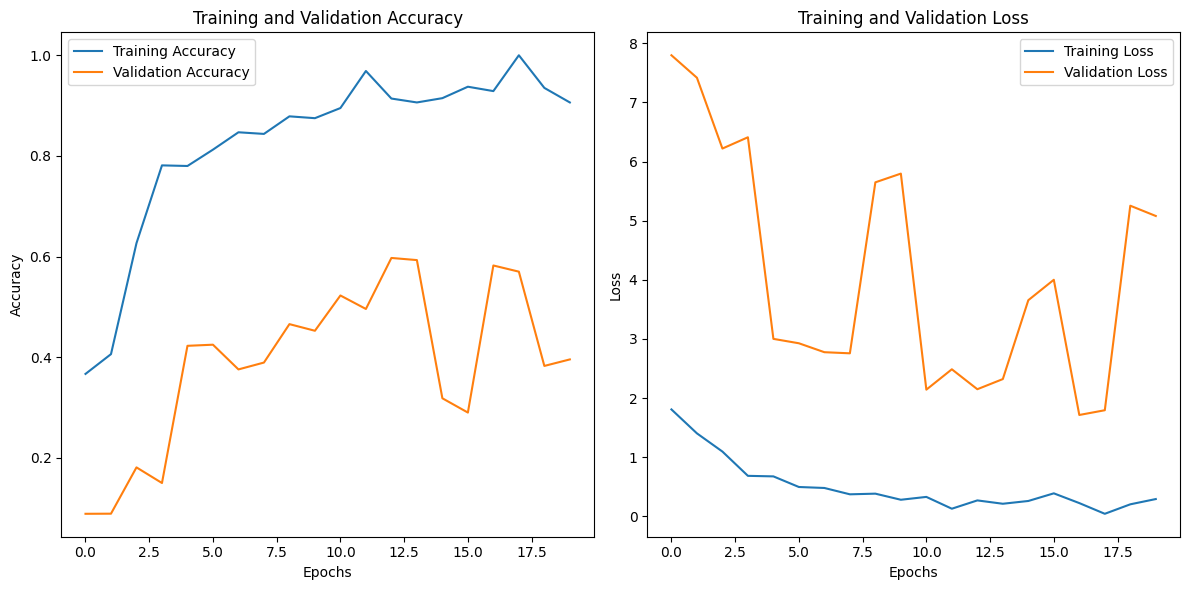

In [31]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training logs
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # 'accuracy' instead of 'acc'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # 'val_accuracy' instead of 'val_acc'
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
val_df.head(2)

subject classname            img
2897     p015        c5  img_62657.jpg
18332    p061        c6  img_87968.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


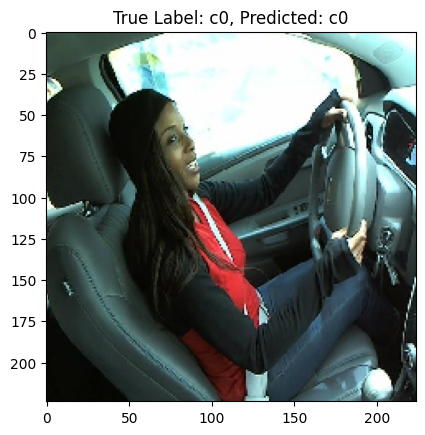

Predicted class: c0, True class: c0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


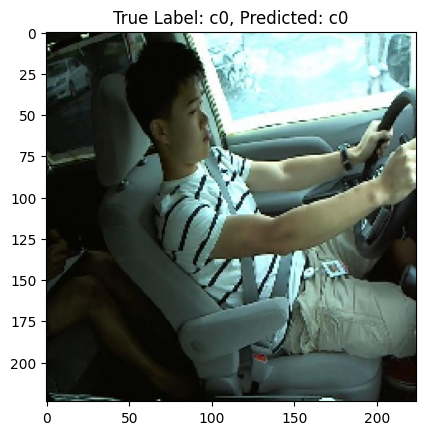

Predicted class: c0, True class: c0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


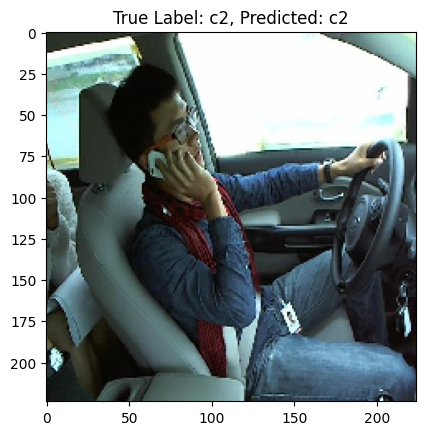

Predicted class: c2, True class: c2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


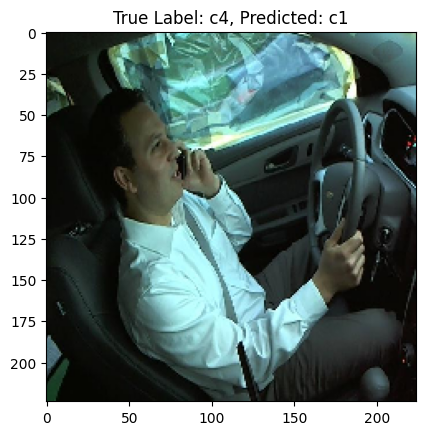

Predicted class: c1, True class: c4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


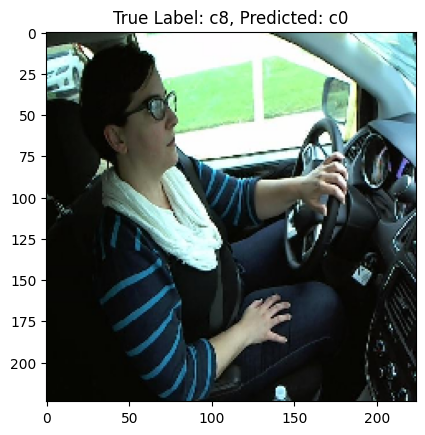

Predicted class: c0, True class: c8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


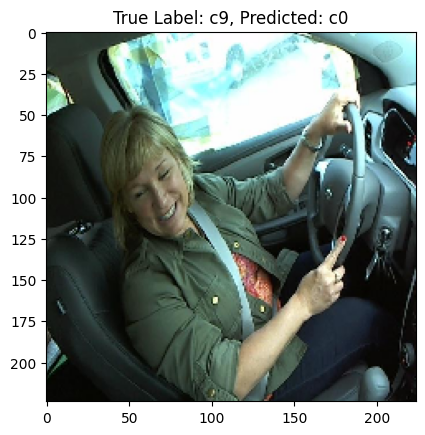

Predicted class: c0, True class: c9


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import pandas as pd

# Example list of images you want to check
myim = ['/content/train/val1/c0/img_100922.jpg','/content/train/val1/c0/img_11582.jpg',
        '/content/train/val1/c2/img_10146.jpg','/content/train/val1/c4/img_100297.jpg',
        '/content/train/val1/c8/img_100814.jpg','/content/train/val1/c9/img_100286.jpg']

# Create the validation DataFrame from the images in myim
# Dynamically create the 'filename' and 'class' columns for val_df
filenames = []
labels = []
for img_path in myim:
    # Extract the class label from the directory structure (e.g., 'c0', 'c5', 'c7')
    class_label = img_path.split('/')[4]  # This extracts 'c0', 'c5', etc.
    filenames.append(img_path.split('/')[-1])  # Extract just the filename, e.g., 'img_10053.jpg'
    labels.append(int(class_label[1:]))  # Extract the number part (e.g., 'c0' -> 0, 'c5' -> 5)

# Create the DataFrame
val_df = pd.DataFrame({
    'filename': filenames,
    'class': labels
})

# Class labels
class_labels = [f'c{i}' for i in range(10)]  # ['c0', 'c1', ..., 'c9']

# Make predictions and show images with labels
for img_path in myim:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to the target input size
    x = image.img_to_array(img)  # Convert image to numpy array
    x = x / 255.0   #preprocess_input(x)  # Preprocess the image (if using a model like InceptionV3)
    x = np.expand_dims(x, axis=0)  # Add batch dimension

    # Predict the class
    pred_class_idx = np.argmax(model.predict(x), axis=1)[0]  # Get the predicted class index
    pred_class = class_labels[pred_class_idx]  # Map index to label

    # Get the true label from val_df by matching the filename
    true_label_idx = val_df[val_df['filename'] == img_path.split('/')[-1]]['class'].values[0]
    true_label = class_labels[true_label_idx]  # Map index to label

    # Display the image, true label, and predicted label
    plt.imshow(img)
    plt.title(f'True Label: {true_label}, Predicted: {pred_class}')
    plt.show()

    # Print the predicted class and true class
    print(f'Predicted class: {pred_class}, True class: {true_label}')


In [37]:
sample = pd.read_csv('/content/sample_submission.csv')
sample.head()

img   c0   c1   c2   c3   c4   c5   c6   c7   c8   c9
0       img_1.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
1      img_10.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
2     img_100.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
3    img_1000.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
4  img_100000.jpg  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1

If your test_dir does not have subdirectories for each class (i.e., it's just a mix of images from all classes), the flow_from_directory function will not work properly in this setup. The reason is that flow_from_directory expects a directory structure where each subdirectory corresponds to a class label (like in your train and val directories). Since the test_dir doesn't have this structure,

In [38]:
len(os.listdir('/content/test'))

79726

In [39]:
test_dir = '/content/test'

In [42]:
import tensorflow as tf
import os

# Path to your test images directory
test_dir = '/content/test/'

# Function to load and preprocess the image
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])  # Resize the image
    img = img / 255.0  # Normalize the image to the range [0,1]
    return img

# Collect all image paths from the directory
test_image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith('.jpg')]

# Create a TensorFlow Dataset from image paths
test_images_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)

# Map the load_image function to the dataset and batch the data
test_images_ds = test_images_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32).prefetch(tf.data.experimental.AUTOTUNE)



In [43]:
# Now, you can use this `test_images_ds` with the model to make predictions:
predictions = model.predict(test_images_ds, steps=len(test_images_ds))


2492/2492 ━━━━━━━━━━━━━━━━━━━━ 159s 64ms/step


In [44]:
# To view predictions as a DataFrame (if multi-class):
import pandas as pd
import numpy as np

df = pd.DataFrame(np.round(predictions, 2), columns=[f'c{i}' for i in range(predictions.shape[1])])


In [45]:
df.shape, sample.shape

((79726, 10), (79726, 11))

In [46]:
merged_df = pd.concat([sample['img'],df], axis=1)

In [47]:
merged_df.head(10)

img    c0    c1    c2   c3   c4   c5    c6   c7    c8   c9
0       img_1.jpg  0.00  0.00  0.00  0.0  0.0  0.0  0.00  1.0  0.00  0.0
1      img_10.jpg  0.02  0.01  0.00  0.0  0.0  0.0  0.00  0.5  0.46  0.0
2     img_100.jpg  0.51  0.00  0.00  0.0  0.0  0.0  0.02  0.0  0.27  0.2
3    img_1000.jpg  0.14  0.73  0.01  0.0  0.0  0.0  0.01  0.0  0.12  0.0
4  img_100000.jpg  0.79  0.21  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0
5  img_100001.jpg  0.00  1.00  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0
6  img_100002.jpg  1.00  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0
7  img_100003.jpg  0.02  0.81  0.00  0.0  0.0  0.0  0.00  0.0  0.17  0.0
8  img_100004.jpg  1.00  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0
9  img_100005.jpg  0.02  0.28  0.00  0.0  0.0  0.0  0.00  0.0  0.71  0.0

In [48]:
val_df.head(2)

filename  class
0  img_100922.jpg      0
1   img_11582.jpg      0

In [49]:
merged_df.to_csv('submission1.csv', index=False)

# VGG16

In [51]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [53]:
for layer in base_model.layers:
  layer.trainable= False

In [54]:
from tensorflow.keras.models import Sequential

model =Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [58]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(224,224),
                                                batch_size=32, class_mode='categorical')

Found 17939 images belonging to 10 classes.
Found 4485 images belonging to 10 classes.


In [60]:
model.fit(train_generator, validation_data=val_generator, epochs=20,
          callbacks=[checkpoint_callback])

Epoch 1/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.7632 - loss: 0.6913

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from 0.59732 to 0.93735, saving model to best_model.keras
561/561 ━━━━━━━━━━━━━━━━━━━━ 128s 229ms/step - accuracy: 0.7633 - loss: 0.6911 - val_accuracy: 0.9373 - val_loss: 0.2214
Epoch 2/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8830 - loss: 0.3539
Epoch 2: val_accuracy improved from 0.93735 to 0.94894, saving model to best_model.keras
561/561 ━━━━━━━━━━━━━━━━━━━━ 122s 218ms/step - accuracy: 0.8830 - loss: 0.3539 - val_accuracy: 0.9489 - val_loss: 0.1740
Epoch 3/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9030 - loss: 0.2840
Epoch 3: val_accuracy improved from 0.94894 to 0.96455, saving model to best_model.keras
561/561 ━━━━━━━━━━━━━━━━━━━━ 123s 219ms/step - accuracy: 0.9030 - loss: 0.2840 - val_accuracy: 0.9645 - val_loss: 0.1238
Epoch 4/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9249 - loss: 0.2276
Epoch 4: val_accuracy improved from 0.96455 to 0.96611, saving model to best_model.keras
561/561 ━━━━━━━━

In [61]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.keras')


In [62]:
import numpy as np

# Predict on new data (e.g., test_data or test_generator)
predictions = best_model.predict(val_generator)

# Use np.argmax to get the class with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class indices
predicted_classes[:20]


141/141 ━━━━━━━━━━━━━━━━━━━━ 27s 188ms/step


array([4, 6, 9, 2, 5, 3, 4, 9, 9, 8, 8, 1, 3, 0, 9, 0, 0, 2, 7, 4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


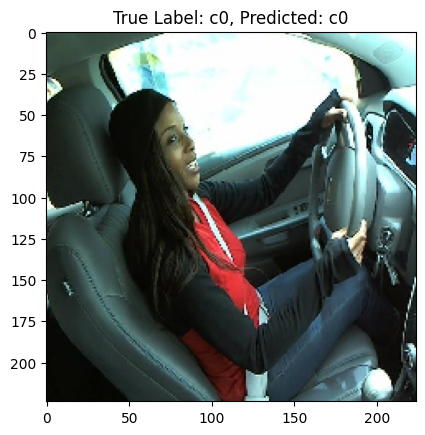

Predicted class: c0, True class: c0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


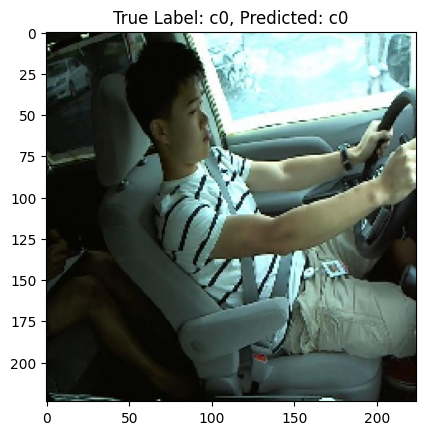

Predicted class: c0, True class: c0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


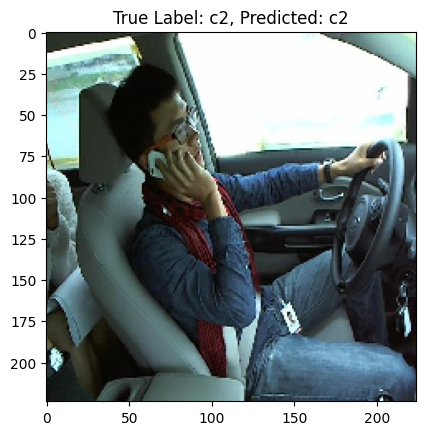

Predicted class: c2, True class: c2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


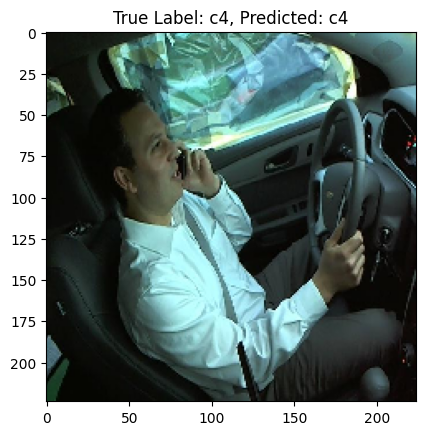

Predicted class: c4, True class: c4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


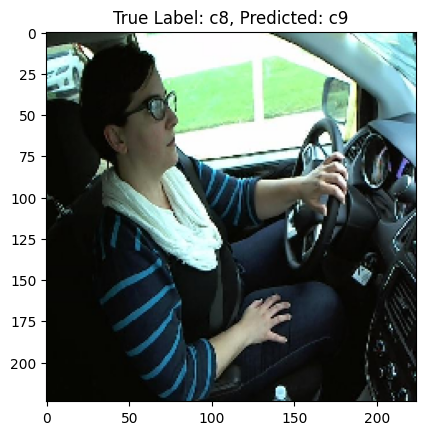

Predicted class: c9, True class: c8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


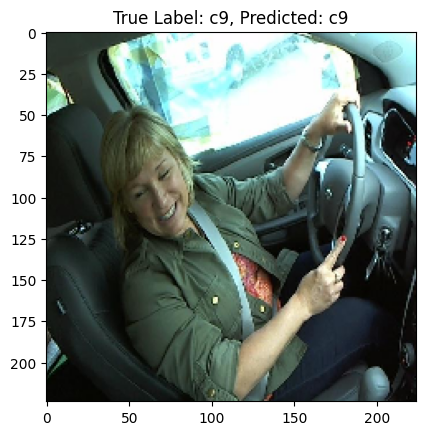

Predicted class: c9, True class: c9


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import pandas as pd

# Example list of images you want to check
myim = ['/content/train/val1/c0/img_100922.jpg','/content/train/val1/c0/img_11582.jpg',
        '/content/train/val1/c2/img_10146.jpg','/content/train/val1/c4/img_100297.jpg',
        '/content/train/val1/c8/img_100814.jpg','/content/train/val1/c9/img_100286.jpg']

# Create the validation DataFrame from the images in myim
# Dynamically create the 'filename' and 'class' columns for val_df
filenames = []
labels = []
for img_path in myim:
    # Extract the class label from the directory structure (e.g., 'c0', 'c5', 'c7')
    class_label = img_path.split('/')[4]  # This extracts 'c0', 'c5', etc.
    filenames.append(img_path.split('/')[-1])  # Extract just the filename, e.g., 'img_10053.jpg'
    labels.append(int(class_label[1:]))  # Extract the number part (e.g., 'c0' -> 0, 'c5' -> 5)

# Create the DataFrame
val_df = pd.DataFrame({
    'filename': filenames,
    'class': labels
})

# Class labels
class_labels = [f'c{i}' for i in range(10)]  # ['c0', 'c1', ..., 'c9']

# Make predictions and show images with labels
for img_path in myim:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to the target input size
    x = image.img_to_array(img)  # Convert image to numpy array
    x =  preprocess_input(x)  # Preprocess the image (if using a model like InceptionV3)
    x = np.expand_dims(x, axis=0)  # Add batch dimension

    # Predict the class
    pred_class_idx = np.argmax(best_model.predict(x), axis=1)[0]  # Get the predicted class index
    pred_class = class_labels[pred_class_idx]  # Map index to label

    # Get the true label from val_df by matching the filename
    true_label_idx = val_df[val_df['filename'] == img_path.split('/')[-1]]['class'].values[0]
    true_label = class_labels[true_label_idx]  # Map index to label

    # Display the image, true label, and predicted label
    plt.imshow(img)
    plt.title(f'True Label: {true_label}, Predicted: {pred_class}')
    plt.show()

    # Print the predicted class and true class
    print(f'Predicted class: {pred_class}, True class: {true_label}')


In [65]:
import tensorflow as tf
import os
from tensorflow.keras.applications.vgg16 import preprocess_input  # Import preprocess_input for VGG16

# Path to your test images directory
test_dir = '/content/test/'

# Function to load and preprocess the image
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])  # Resize the image
    img = preprocess_input(img)  # Normalize the image using VGG16 preprocessing
    return img

# Collect all image paths from the directory
test_image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith('.jpg')]

# Create a TensorFlow Dataset from image paths
test_images_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)

# Map the load_image function to the dataset and batch the data
test_images_ds = test_images_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32).prefetch(tf.data.experimental.AUTOTUNE)


In [66]:
# Now, you can use this `test_images_ds` with the model to make predictions:
predictions = best_model.predict(test_images_ds, steps=len(test_images_ds))


2492/2492 ━━━━━━━━━━━━━━━━━━━━ 477s 176ms/step


In [67]:
# To view predictions as a DataFrame (if multi-class):
import pandas as pd
import numpy as np

df = pd.DataFrame(np.round(predictions, 2), columns=[f'c{i}' for i in range(predictions.shape[1])])


In [68]:
merged_df = pd.concat([sample['img'],df], axis=1)

In [69]:
merged_df.head(10)

img    c0    c1   c2    c3    c4    c5    c6    c7    c8    c9
0       img_1.jpg  0.00  0.00  0.0  0.00  0.00  0.00  0.00  1.00  0.00  0.00
1      img_10.jpg  0.00  0.00  0.0  0.00  0.00  0.00  0.00  1.00  0.00  0.00
2     img_100.jpg  0.50  0.06  0.0  0.22  0.10  0.02  0.01  0.00  0.01  0.08
3    img_1000.jpg  0.00  0.00  0.0  1.00  0.00  0.00  0.00  0.00  0.00  0.00
4  img_100000.jpg  0.00  0.00  0.0  0.98  0.00  0.00  0.00  0.00  0.02  0.00
5  img_100001.jpg  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  1.00  0.00
6  img_100002.jpg  0.67  0.04  0.0  0.00  0.00  0.00  0.00  0.03  0.06  0.19
7  img_100003.jpg  0.00  0.23  0.0  0.00  0.00  0.77  0.00  0.00  0.00  0.00
8  img_100004.jpg  0.00  0.00  0.0  0.26  0.02  0.00  0.00  0.00  0.55  0.16
9  img_100005.jpg  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  1.00  0.00

In [70]:
merged_df.to_csv('submission.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Raw model output for /content/test/img_100001.jpg: [[7.4923156e-15 7.2795719e-17 1.7757544e-17 9.9999237e-01 7.6847937e-06
  2.4645884e-12 4.2066735e-15 4.2157982e-15 6.4467254e-09 3.3321911e-08]]
Predicted class index for /content/test/img_100001.jpg: 3
Predicted class label for /content/test/img_100001.jpg: c3


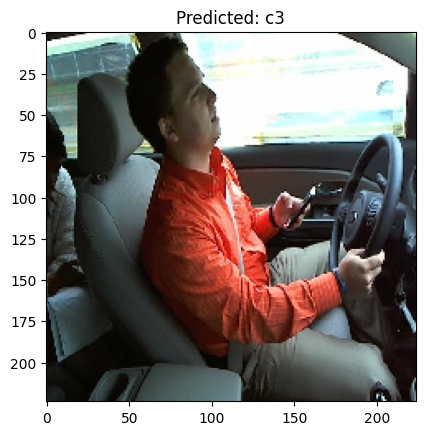

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Raw model output for /content/test/img_100059.jpg: [[9.2824847e-13 1.0970481e-05 6.9108685e-03 2.0497633e-10 1.7623361e-16
  1.7234530e-05 9.9295807e-01 5.2586693e-05 4.9981132e-05 3.8905821e-07]]
Predicted class index for /content/test/img_100059.jpg: 6
Predicted class label for /content/test/img_100059.jpg: c6


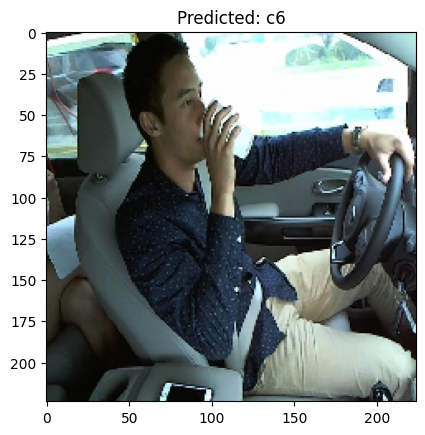

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Raw model output for /content/test/img_100147.jpg: [[3.5573697e-11 5.0306195e-14 1.6392186e-12 9.9951494e-01 4.8476647e-04
  8.2225594e-11 4.3512808e-14 3.2437990e-16 3.0638441e-07 7.0225186e-09]]
Predicted class index for /content/test/img_100147.jpg: 3
Predicted class label for /content/test/img_100147.jpg: c3


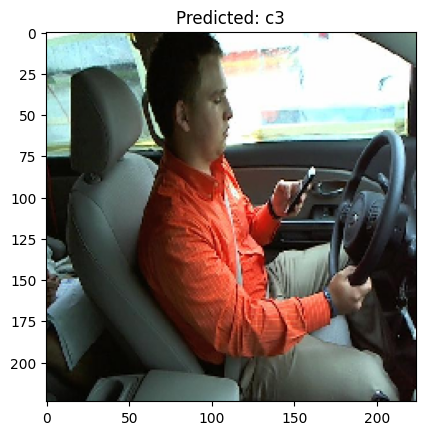

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Raw model output for /content/test/img_100000.jpg: [[7.7296390e-12 8.6397528e-10 2.1254510e-11 9.9999940e-01 8.4381732e-08
  1.9527677e-08 2.6019649e-09 3.4714496e-09 2.4490450e-07 1.8158237e-07]]
Predicted class index for /content/test/img_100000.jpg: 3
Predicted class label for /content/test/img_100000.jpg: c3


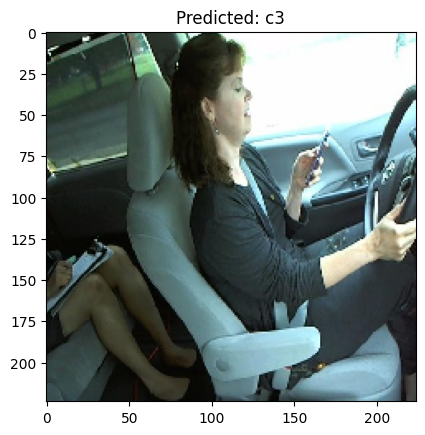

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Raw model output for /content/test/img_44317.jpg: [[2.5321096e-06 2.6112107e-07 2.9254763e-04 3.1865469e-01 5.9615802e-03
  1.3701324e-06 3.0685945e-03 1.5336096e-04 6.7158061e-01 2.8446314e-04]]
Predicted class index for /content/test/img_44317.jpg: 8
Predicted class label for /content/test/img_44317.jpg: c8


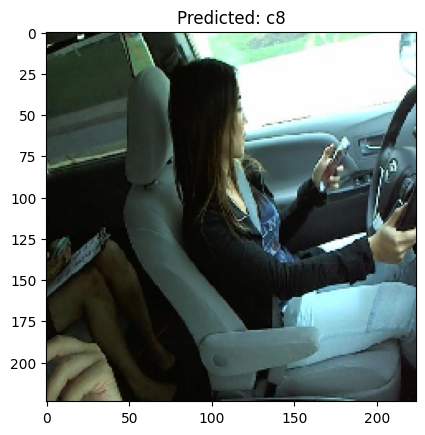

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Raw model output for /content/test/img_10736.jpg: [[1.1493206e-06 7.6334953e-07 8.5990965e-01 1.3201880e-10 9.1797929e-09
  7.3531550e-07 5.0540030e-04 4.1317836e-08 1.3958229e-01 1.7814289e-08]]
Predicted class index for /content/test/img_10736.jpg: 2
Predicted class label for /content/test/img_10736.jpg: c2


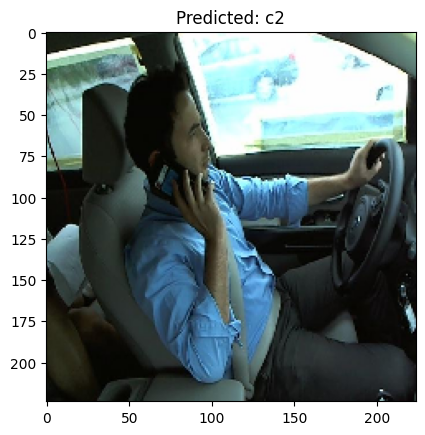

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# List of image paths to make predictions on
myim = [
    '/content/test/img_100001.jpg',
    '/content/test/img_100059.jpg',
    '/content/test/img_100147.jpg',
    '/content/test/img_100000.jpg',
    '/content/test/img_44317.jpg',
    '/content/test/img_10736.jpg'
]

# Example function to preprocess the images if you trained with pixel values scaled to [0, 1]
def preprocess_input_custom(x):
    x = x / 255.0  # Assuming you normalized the data to [0, 1] during training
    return x

# Make predictions and show images
for img_path in myim:
    # Load the image with the target size used during training
    img = image.load_img(img_path, target_size=(224, 224))  # Ensure the target size matches the input size of your model
    x = image.img_to_array(img)  # Convert the image to a numpy array
    x = preprocess_input(x)  # Apply your custom preprocessing
    x = np.expand_dims(x, axis=0)  # Add batch dimension (model expects a batch)

    # Get the raw output from the model (predictions)
    raw_output = best_model.predict(x)

    # Print the raw output (probabilities) for inspection
    print(f"Raw model output for {img_path}: {raw_output}")

    # Get the predicted class index
    pred_class_idx = np.argmax(raw_output, axis=1)[0]
    print(f"Predicted class index for {img_path}: {pred_class_idx}")

    # Map the predicted class index to the actual class label if needed
    class_labels = [f'c{i}' for i in range(10)]  # Assuming labels are c0 to c9
    pred_class = class_labels[pred_class_idx]  # Map index to class label
    print(f"Predicted class label for {img_path}: {pred_class}")

    # Display the image and its predicted class
    plt.imshow(img)
    plt.title(f"Predicted: {pred_class}")
    plt.show()
